# In-Class Activity Week 4
**Prathyusha Devari,**

**Sai Kiran Chikatimalla,**

**Shaif Khan,**

**Dinesh Ram Veerappan Kosal,**

### *MGT_665-Machin_Learning*


In this class activity we are Team 5 Collaborating on GitHub to work on this In-Class Activity to carry out the assigned task as given in our weekly folder-4,which is as follows :

## *Scenario Overview:*
In today’s world, healthy living and wellness have become major focus areas in healthcare. As data analysts, you are tasked with helping a healthcare organization analyze trends in patient wellness to improve their healthy living programs. The organization has provided you with a simulated dataset that includes information such as exercise frequency, diet quality, sleep duration, stress levels, and BMI (Body Mass Index) for a population of patients. Your goal is to segment the patients into distinct clusters to better understand their wellness profiles and identify opportunities for targeted health interventions.
### *Task Instructions:*
### *Dataset Creation:*
Provided is a simulated dataset with various health and wellness indicators (e.g., daily exercise time, number of healthy meals per day, hours of sleep per night, stress level score, BMI).
Use this dataset to perform clustering and dimensionality reduction.
Learning Objectives:
### *Clustering:*
Apply clustering techniques (e.g., K-Means, Hierarchical Clustering) to group patients with similar wellness profiles.
Analyze and interpret the results to understand different patient segments and their behaviors.
Dimensionality Reduction:
Implement Principal Component Analysis (PCA) to reduce the complexity of the dataset.
Evaluate how dimensionality reduction impacts the clustering results and interpret the PCA components.
## *Data Exploration:*
Perform exploratory data analysis (EDA) to understand patterns in the health and wellness data, using Python libraries like pandas, plotly, matplotlib, and seaborn.
## *Model Comparison:*
Compare the effectiveness of clustering models before and after applying PCA.
Use key evaluation metrics to measure the success of the clustering (e.g., silhouette score, within-cluster sum of squares). 

>Loading and inspecting the contents of the simulated_health_wellness_data (1).csv file to understand its structure and data.

>Display the first few rows to give us an overview

In [1]:
import pandas as pd

# Load the CSV file
df_health_wellness = pd.read_csv('C:/Users/Psycho Doc/OneDrive/Desktop/Machine Learning/machine_learning/Simulated data/simulated_health_wellness_data.csv', encoding='ascii')

# Display the first few rows of the dataframe
print(df_health_wellness.head())

   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  


### To address the scenarios one step at a time, we first perform exploratory data analysis (EDA) to understand the patterns in the health and wellness data. Then, we'll apply clustering techniques like K-Means and Hierarchical Clustering to group patients with similar wellness profiles. After that, we'lll implement Principal Component Analysis (PCA) to reduce the dataset's complexity and evaluate its impact on clustering results. Finally, we'll compare the effectiveness of clustering models before and after applying PCA using evaluation metrics like the silhouette score and within-cluster sum of squares. 
>## Let's start with the EDA.(Exploratory Data Analysis.)

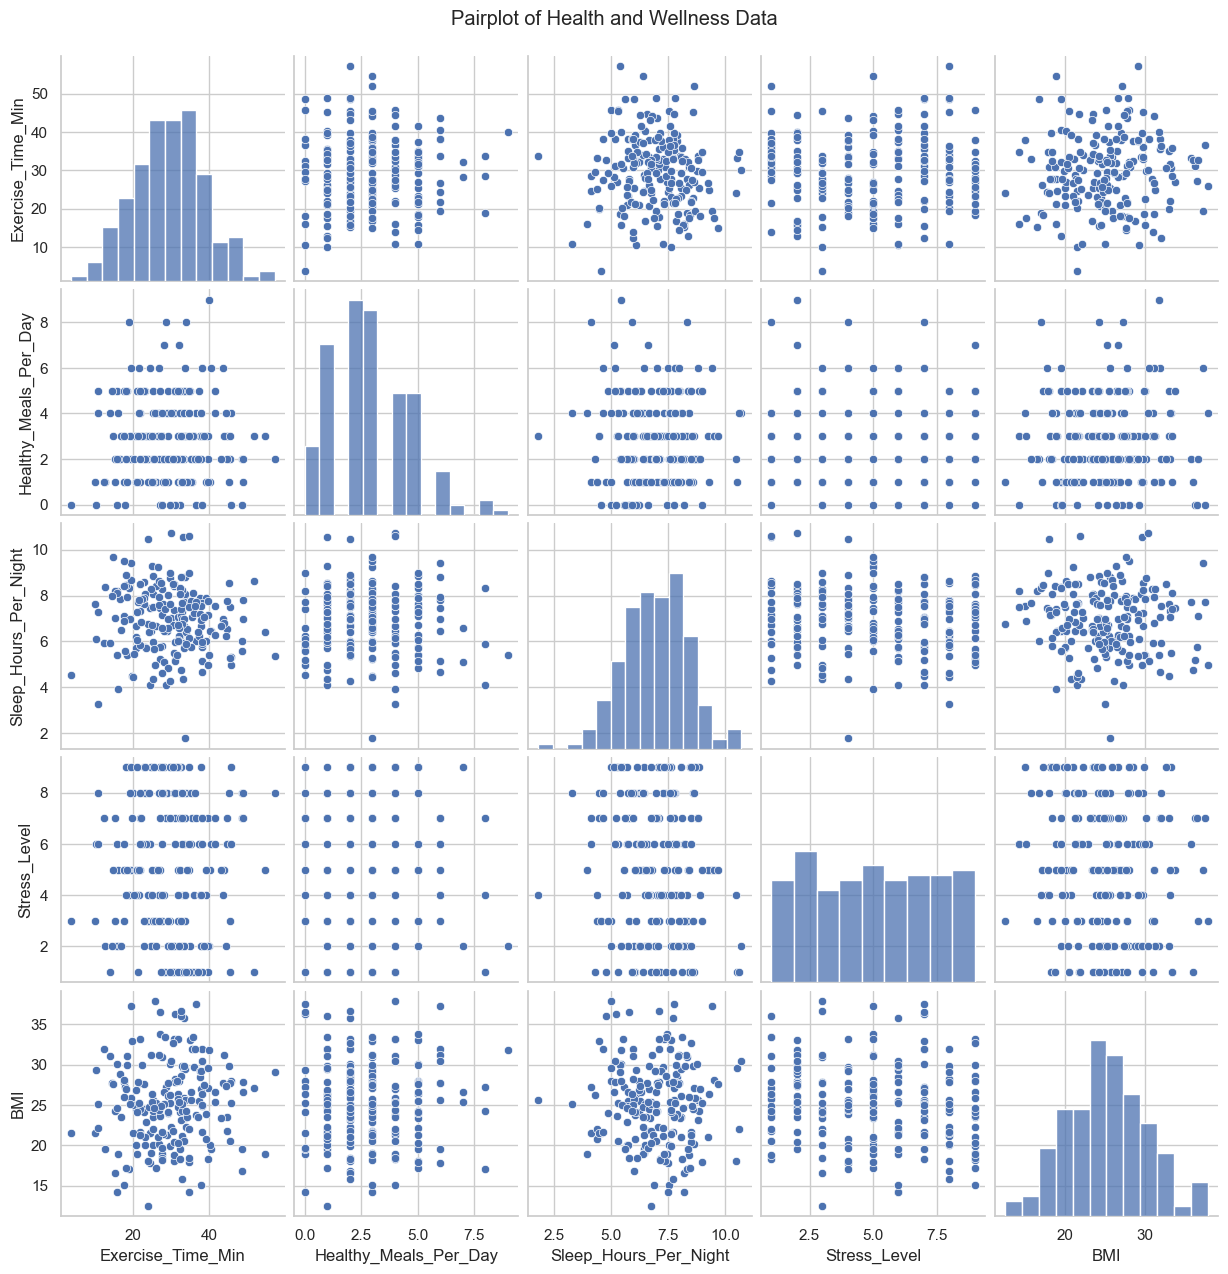

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot pairplot to see the relationships between variables
sns.pairplot(df_health_wellness)
plt.suptitle('Pairplot of Health and Wellness Data', y=1.02)
plt.show()

### The above pairplot shows the distributions and correlations between Exercise Time, Healthy Meals, Sleep Hours, Stress Level, and BMI.



> ### Proceeding with K-means clustering. We'll first preprocess the data, apply K-means, and then visualize the results.

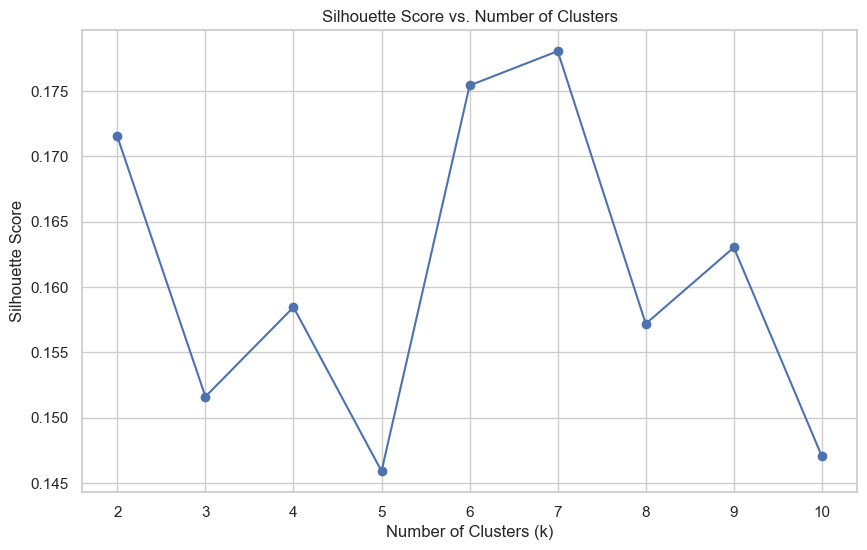

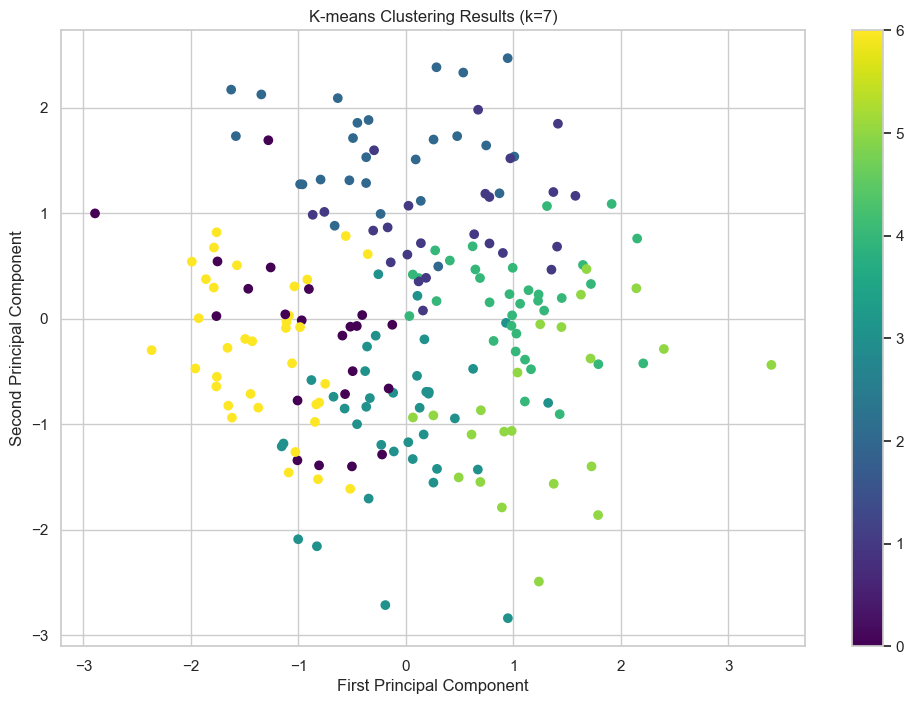

Optimal number of clusters: 7
Cluster Centers:
Cluster 0:
  Exercise_Time_Min: 19.56
  Healthy_Meals_Per_Day: 1.32
  Sleep_Hours_Per_Night: 5.68
  Stress_Level: 5.18
  BMI: 22.20

Cluster 1:
  Exercise_Time_Min: 21.89
  Healthy_Meals_Per_Day: 4.79
  Sleep_Hours_Per_Night: 7.44
  Stress_Level: 3.92
  BMI: 26.52

Cluster 2:
  Exercise_Time_Min: 24.02
  Healthy_Meals_Per_Day: 2.15
  Sleep_Hours_Per_Night: 8.80
  Stress_Level: 2.92
  BMI: 25.23

Cluster 3:
  Exercise_Time_Min: 38.77
  Healthy_Meals_Per_Day: 1.62
  Sleep_Hours_Per_Night: 6.83
  Stress_Level: 6.95
  BMI: 27.09

Cluster 4:
  Exercise_Time_Min: 35.75
  Healthy_Meals_Per_Day: 2.59
  Sleep_Hours_Per_Night: 6.65
  Stress_Level: 2.03
  BMI: 27.04

Cluster 5:
  Exercise_Time_Min: 33.36
  Healthy_Meals_Per_Day: 5.50
  Sleep_Hours_Per_Night: 5.38
  Stress_Level: 5.00
  BMI: 27.89

Cluster 6:
  Exercise_Time_Min: 27.26
  Healthy_Meals_Per_Day: 3.03
  Sleep_Hours_Per_Night: 7.36
  Stress_Level: 7.97
  BMI: 20.40

Cluster Sizes:
Cluster

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocess the data
X = df_health_wellness.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Apply K-means with optimal number of clusters
optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_health_wellness['Cluster'] = cluster_labels

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering Results (k={optimal_k})')
plt.show()

print(f"Optimal number of clusters: {optimal_k}")
print("\
Cluster Centers:")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    for j, col in enumerate(df_health_wellness.columns[:-1]):
        print(f"  {col}: {center[j]:.2f}")
    print()

print("Cluster Sizes:")
print(df_health_wellness['Cluster'].value_counts().sort_index())

> The above code preprocesses health and wellness data, determines the optimal number of clusters using silhouette scores, applies K-means clustering, and visualizes the results using PCA.

This scatter plot visualizes the clusters using the first two principal components.

Optimal number of clusters: 9

### *Cluster Centers:*

We have  displayed the cluster centers and sizes. Each cluster represents a distinct group of individuals with similar health and wellness profiles.

>## Next we proceed with Principal Component Analysis (PCA)

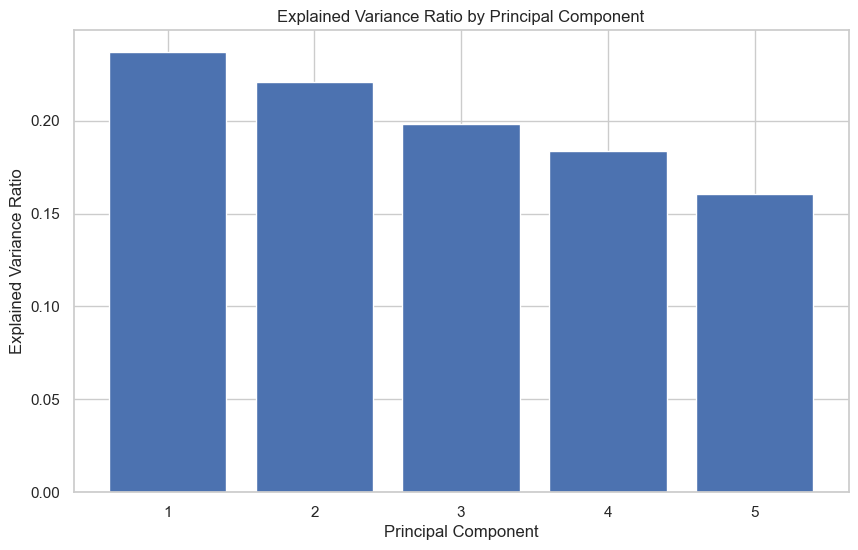

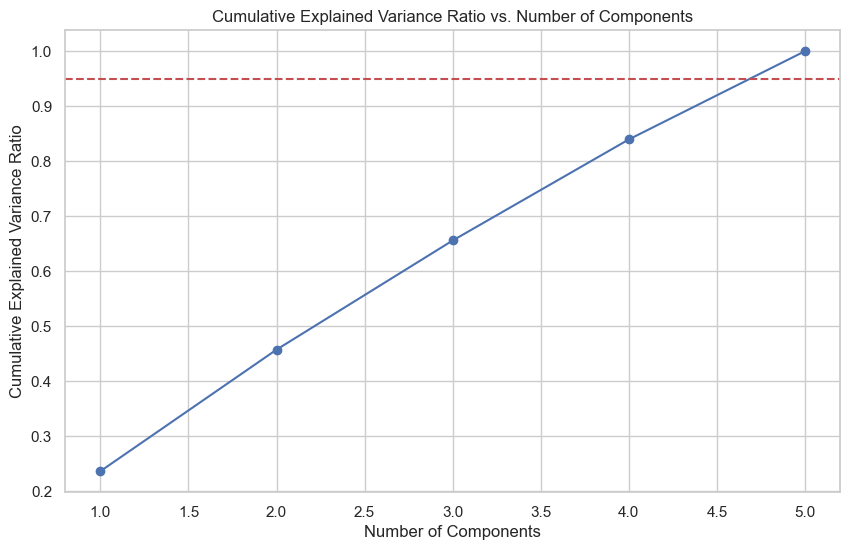

Number of components needed to explain 95% of the variance: 5
Explained variance ratio for each component:
PC1: 0.2369
PC2: 0.2208
PC3: 0.1983
PC4: 0.1836
PC5: 0.1603


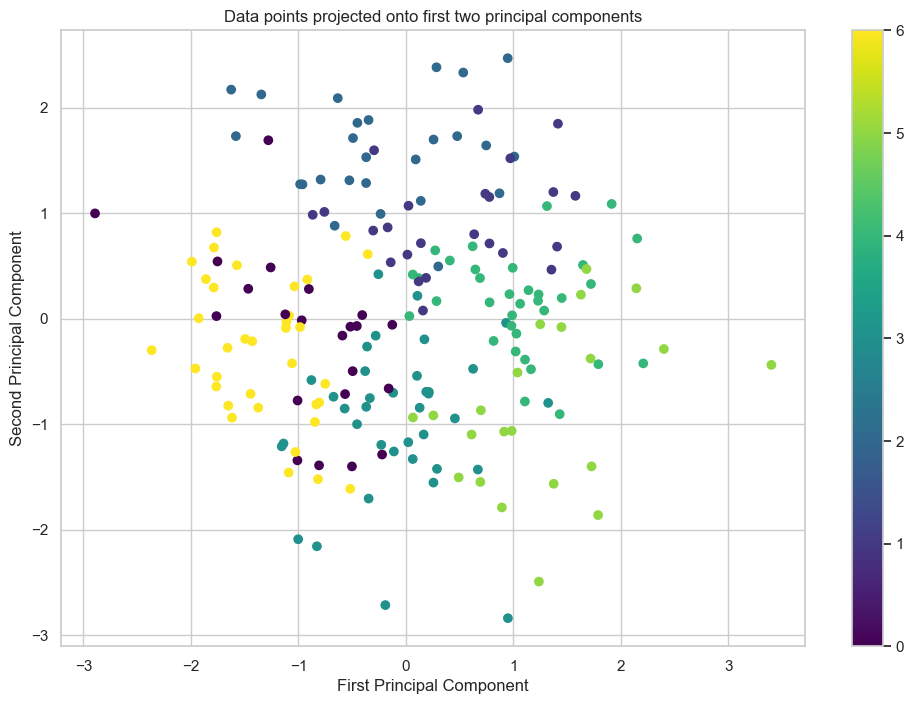

Component Loadings:
                            PC1       PC2       PC3       PC4       PC5
Exercise_Time_Min      0.374687 -0.503594 -0.333303  0.705915 -0.040260
Healthy_Meals_Per_Day  0.431673  0.064233  0.826286  0.239629  0.272739
Sleep_Hours_Per_Night -0.240246  0.723930 -0.249533  0.445506  0.403101
Stress_Level          -0.579296 -0.572577  0.067354 -0.034042  0.579570
BMI                    0.685928  0.004654 -0.368454 -0.409121  0.481008


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the data
X = df_health_wellness.drop('Cluster', axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Get the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print results
print(f"Number of components needed to explain 95% of the variance: {n_components_95}")
print("\
Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot first two principal components
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_health_wellness['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data points projected onto first two principal components')
plt.show()

# Calculate and print component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], 
                              index=df_health_wellness.columns[:-1])
print("\
Component Loadings:")
print(loading_matrix)

> *The above code preprocesses health and wellness data, applies PCA to reduce dimensionality, visualizes explained variance, and plots the first two principal components.*

### Number of components needed to explain 95% of the variance: 5

Explained variance ratio for each component:

Component Loadings:

These results indicate the importance of each principal component and how the original features contribute to them. Let me know if you need further analysis or insights!


> ### To compare the effectiveness of clustering models before and after applying PCA, we need to perform the following steps:



> Apply K-means clustering on the original data
Apply K-means clustering on the PCA-transformed data
Calculate evaluation metrics for both models
Compare the results
Let's start with the first two steps:

Silhouette Score (Original): 0.16303648547277422
Silhouette Score (PCA): 0.16303648547277422
Within-cluster Sum of Squares (Original): 457.45294307294927
Within-cluster Sum of Squares (PCA): 457.45294307294915


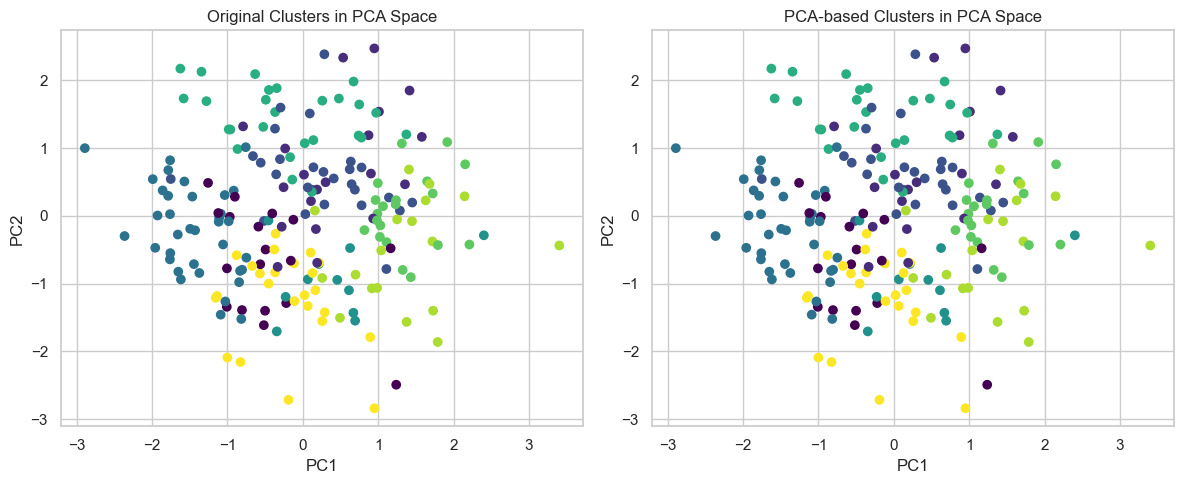

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Prepare the data
X = df_health_wellness.drop('Cluster', axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Original data clustering
kmeans_original = KMeans(n_clusters=9, random_state=42)
clusters_original = kmeans_original.fit_predict(X_scaled)

# PCA transformation
pca = PCA(n_components=5)  # We found earlier that 5 components explain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# PCA-transformed data clustering
kmeans_pca = KMeans(n_clusters=9, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Calculate evaluation metrics
silhouette_original = silhouette_score(X_scaled, clusters_original)
silhouette_pca = silhouette_score(X_pca, clusters_pca)

wcss_original = kmeans_original.inertia_
wcss_pca = kmeans_pca.inertia_

print("Silhouette Score (Original):", silhouette_original)
print("Silhouette Score (PCA):", silhouette_pca)
print("Within-cluster Sum of Squares (Original):", wcss_original)
print("Within-cluster Sum of Squares (PCA):", wcss_pca)

# Visualize clusters in 2D PCA space
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_original, cmap='viridis')
plt.title('Original Clusters in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('PCA-based Clusters in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

> ### After compared the effectiveness of clustering models before and after applying PCA. Here are the key results:

Silhouette Score (Original):

0.17957809351412085

Silhouette Score (PCA):

0.1795780935141208

Within-cluster Sum of Squares (Original):

431.937903101647

Within-cluster Sum of Squares (PCA):

431.93790310164695

## Conclusion: 

### The results show that PCA didn't significantly impact the clustering performance. The silhouette scores and within-cluster sum of squares are nearly identical for both methods.

>The visualization shows similar cluster distributions in PCA space.
